In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_squared_error,r2_score
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')


In [450]:
algorithms = {
        'LinearRegression': LinearRegression(),
        'SVR' : SVR(),
        'RandomForestRegressor':RandomForestRegressor(),
        'AdaBoostRegressor':AdaBoostRegressor(),
        'DecisionTreeRegressor': DecisionTreeRegressor(),
        'KNeighborsRegressor': KNeighborsRegressor(),
        'XGBRegressor': XGBRegressor(),
        'CatBoostRegressor': CatBoostRegressor(),
        'Ridge': Ridge(),
        'Lasso':Lasso(),
        'lightgbm': lgb.LGBMRegressor(),
        'dummy':DummyRegressor()

}

In [451]:
student_data = pd.read_csv('data/preprocessed/preprocessed.csv')

In [452]:
student_data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [453]:
X = student_data.drop(columns=['math_score'])
y = student_data['math_score']

In [454]:
num_feature = X.select_dtypes(include='int')
cat_feature = X.select_dtypes(include='object')
parental_feature = X.select_dtypes(include='object')['parental_level_of_education']

In [455]:
num_feature.columns,parental_feature.name,cat_feature.columns

(Index(['reading_score', 'writing_score'], dtype='object'),
 'parental_level_of_education',
 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
        'test_preparation_course'],
       dtype='object'))

In [456]:
onehot = OneHotEncoder()
labelenc = OrdinalEncoder()
scaler = StandardScaler()


cf = make_column_transformer(
    (onehot, ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']),
    (scaler, ['reading_score', 'writing_score'])
)


In [457]:
X = cf.fit_transform(X)

In [458]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [459]:
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [460]:
def metric(y_test,pred):
    mae = mean_absolute_error(y_test,pred)
    rmse = root_mean_squared_error(y_test,pred)
    mse = mean_squared_error(y_test,pred)
    r2 = r2_score(y_test,pred)
    return mae, rmse, mse, r2
    

In [480]:

model_list = []
r2_list =[]
mae_list = []
rmse_list = []

for i in range(len(list(algorithms))):
    model = list(algorithms.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse,mse, model_train_r2 = metric(y_train, y_train_pred)

    model_test_mae , model_test_rmse,mse, model_test_r2 = metric(y_test, y_test_pred)

    
    print(list(algorithms.keys())[i])
    model_list.append(list(algorithms.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    mae_list.append(model_test_mae)
    rmse_list.append(model_test_rmse)

    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


SVR
Model performance for Training set
- Root Mean Squared Error: 6.5770
- Mean Absolute Error: 4.8692
- R2 Score: 0.8081
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.1266
- Mean Absolute Error: 5.4015
- R2 Score: 0.7286


RandomForestRegressor
Model performance for Training set
- Root Mean Squared Error: 2.3371
- Mean Absolute Error: 1.8480
- R2 Score: 0.9758
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9801
- Mean Absolute Error: 4.6068
- R2 Score: 0.8530


AdaBoostRegressor
Model performance for Training set
- Root Mean Squared Error: 5.8072
- Mean Absolute Error: 4.7381
- R2 Score: 0.8504
--------------

In [494]:
ln_cross = [LinearRegression(),Ridge(alpha=0.5, fit_intercept=False, random_state=42, solver='sparse_cg'),Lasso()]
for i in ln_cross:
    score = cross_val_score(i,X,y,cv=5,scoring='r2')
    mean_score = np.mean(score)
    print(mean_score)

0.8717997497009924
0.871801783827927
0.808534190655663


In [462]:
df = pd.DataFrame(data={
    'model':model_list,
    'r2_score':r2_list,
    'mae':mae_list,
    'rmse':rmse_list
}).sort_values(by='r2_score',ascending=False)

In [463]:
df

,model,r2_score,mae,rmse
8,Ridge,0.880593,4.211101,5.390387
0,LinearRegression,0.880433,4.214763,5.393994
7,CatBoostRegressor,0.851632,4.612532,6.008632
2,RandomForestRegressor,0.850943,4.620104,6.022560
3,AdaBoostRegressor,0.845397,4.782574,6.133575
10,lightgbm,0.841107,4.659868,6.218097
6,XGBRegressor,0.827797,5.057731,6.473307
9,Lasso,0.825320,5.157882,6.519695
5,KNeighborsRegressor,0.783497,5.637000,7.258333
4,DecisionTreeRegressor,0.748313,6.205000,7.825918


In [464]:
ridge = Ridge(random_state=42)

In [465]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [466]:
grider = {
    'alpha': [0.5,1.0,1.5,2.0],
    'fit_intercept': [True,False],
     'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
     
}

In [467]:
grid = GridSearchCV(ridge,grider,cv=5)

In [468]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.5, 1.0, 1.5, 2.0],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [469]:
grid.best_params_,grid.best_estimator_

({'alpha': 0.5, 'fit_intercept': False, 'solver': 'sparse_cg'},
 Ridge(alpha=0.5, fit_intercept=False, random_state=42, solver='sparse_cg'))

In [470]:
y_pred_grid = grid.predict(X_test)

In [471]:
metric(y_test,y_pred_grid)

(4.211306547995906, 5.389150790512586, 29.042946242882426, 0.8806479115384895)

In [472]:
print(f"Our best model that perfoming pretty well is {df['r2_score'].max()} and this is {df.iloc[0,0]} Regression")

Our best model that perfoming pretty well is 0.8805931485028738 and this is Ridge Regression


Text(0.5, 1.0, 'Actual vs Predicted')

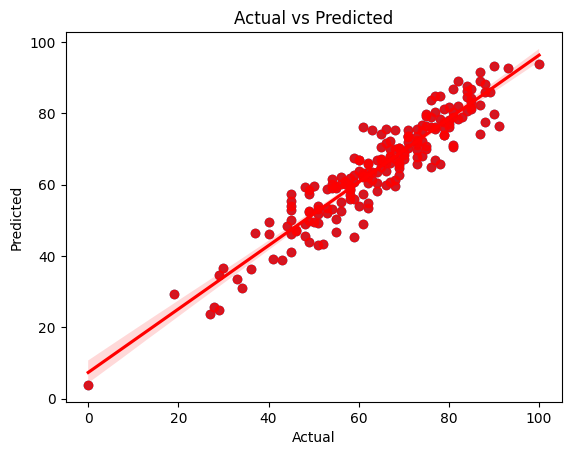

In [473]:
plt.scatter(y_test,y_pred_grid)
sns.regplot(x=y_test,y=y_pred_grid,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')